# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a id='top'></a>
# План проекта:
### <a href='#Step_1'>Шаг 1. Импорт файла с данными и изучение общей информации</a>

### <a href='#Step_2'>Шаг 2. Предобработка данных</a>
#### <a href='#Step_2_1'>2.1 Преобразование названий столбцов</a>
#### <a href='#Step_2_2'>2.2 Преобразование типов данных</a>
#### <a href='#Step_2_3'>2.3 Устранение пропусков в столбце 'locality_name'</a>
#### <a href='#Step_2_4'>2.4 Устранение пропусков в столбце 'floors_total'</a>
#### <a href='#Step_2_5'>2.5 Устранение пропусков в столбце 'living_area'</a>
#### <a href='#Step_2_6'>2.6 Устранение пропусков в столбце 'kitchen_area'</a>
#### <a href='#Step_2_7'>2.7 Устранение пропусков в столбце 'ceiling_height'</a>
#### <a href='#Step_2_8'>2.8 Исследование столбцов distance_to_airport и distance_to_center</a>
#### <a href='#Step_2_9'>2.9 Исследование столбцов parks_around, distance_to_park, ponds_around, distance_to_pond</a>
#### <a href='#Step_2_9'>2.10 Исследование столбца days_in_exposition</a>
 

### <a href='#Step_3'>Шаг 3. Посчитайте и добавьте в таблицу:</a>
#### <a href='#Step_3_1'>3.1 Цена квадратного метра</a>
#### <a href='#Step_3_2'>3.2 День недели, месяц и год публикации объявления</a>
#### <a href='#Step_3_3'>3.3 Этаж квартиры</a>
#### <a href='#Step_3_4'>3.4 Соотношение жилой и общей площади</a>
#### <a href='#Step_3_5'>3.5 Соотношение площади кухни к общей</a>
#### <a href='#Step_3_6'>3.6 Расстояние до центра в км</a>

### <a href='#Step_4'>Шаг 4. Проведите исследовательский анализ данных и выполните инструкции</a>
#### <a href='#Step_4_1'>4.1 Гистограммы: площадь, цена, число комнат, высота потолков</a>
#### <a href='#Step_4_2'>4.2 Исследование времени продажи квартиры</a>
#### <a href='#Step_4_3'>4.3 Исследование выбросов</a>
#### <a href='#Step_4_4'>4.4 Зависимость цены от площади</a>
#### <a href='#Step_4_5'>4.5 Зависимость цены от числа комнат</a>
#### <a href='#Step_4_6'>4.6 Зависимость цены от удаленности от центра</a>
#### <a href='#Step_4_7'>4.7 Зависимость цены от этажа</a>
#### <a href='#Step_4_8'>4.8 Зависимость цены от этажа4.7 Зависимость цены от даты размещения</a>
#### <a href='#Step_4_9'>4.9 Исследование топ-10 населенных пунктов по количеству объявлений</a>
#### <a href='#Step_4_10'>4.10 Исследование квартир в центре Санкт-Петербурга</a>

### <a href='#Step_5'>Шаг 5. Общий вывод</a>

<a id='Step_1'></a>
### Шаг 1. Импорт файла с данными и изучение общей информации

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16656,19,20000000.0,198.1,2018-05-05T00:00:00,6,2.80,12.0,118.4,11,NaN,...,13.8,NaN,Санкт-Петербург,50795.0,14760.0,0.0,NaN,0.0,NaN,NaN
19457,20,5500000.0,68.0,2017-08-14T00:00:00,3,2.90,6.0,45.0,5,NaN,...,9.0,NaN,Санкт-Петербург,19479.0,4234.0,1.0,316.0,1.0,183.0,385.0
19876,2,3570000.0,41.0,2017-09-27T00:00:00,1,NaN,26.0,17.0,12,NaN,...,10.0,2.0,посёлок Парголово,53788.0,18014.0,0.0,NaN,2.0,978.0,253.0
4481,17,3400000.0,32.4,2018-12-31T00:00:00,1,2.50,16.0,17.5,10,NaN,...,6.2,2.0,Санкт-Петербург,49169.0,16096.0,0.0,NaN,0.0,NaN,31.0
21122,9,2800000.0,31.3,2017-05-16T00:00:00,1,2.54,7.0,17.8,2,False,...,5.8,1.0,Санкт-Петербург,18886.0,15274.0,2.0,442.0,1.0,391.0,46.0
23575,15,5750000.0,65.0,2015-07-02T00:00:00,3,2.60,9.0,42.0,1,NaN,...,10.0,0.0,Санкт-Петербург,15871.0,14807.0,1.0,555.0,0.0,NaN,546.0
10039,16,11490000.0,122.1,2018-02-01T00:00:00,5,3.08,6.0,66.6,3,NaN,...,17.1,NaN,Санкт-Петербург,22464.0,4184.0,1.0,465.0,0.0,NaN,NaN
21673,6,2600000.0,36.0,2017-11-12T00:00:00,1,NaN,5.0,17.5,3,NaN,...,8.5,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,390.0
19781,20,8400000.0,59.0,2017-04-28T00:00:00,2,NaN,14.0,36.0,8,NaN,...,10.0,0.0,Санкт-Петербург,12698.0,15290.0,0.0,NaN,2.0,353.0,7.0
4494,5,3500000.0,40.0,2017-09-25T00:00:00,1,2.70,20.0,15.4,12,NaN,...,11.1,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,72.0


### Вывод:

#### Наименование столбцов:
- airports_nearest - исправим на distance_to_airport
- cityCenters_nearest - исправим на distance_to_center

#### Тип данных:
- last_price - копейки в цене квартиры не важны, переведем в int64?
- first_day_exposition - переведем в datetime
- floors_total - количество этажей может быть целым числом, переведем в int64?
- is_apartment - переведем в bool
- balcony - может быть только целое число, переведем в int64
- parks_around3000 - может быть только целое число, переведем в int64
- ponds_around3000 - может быть только целое число, переведем в int64
- days_exposition - для удобства хранения и обработки переведем в int64

#### Пропуски:
- ceiling_height - проверить, нужен ли параметр для целей исследования?
- floors_total - 
- living_area - возможно, не указана для студий
- is_apartment - возможно, устраним проблему, если переведем в bool
- kitchen_area - возможно, площадь не указана для студий
- balcony - возможно, пропуски связаны с отсутсвием балконов
- locality_name - 
- airports_nearest
- cityCenters_nearest
- parks_around3000, ponds_around3000 - предположим, что нет парков и озер, там где пропуски
- parks_nearest, ponds_nearest - параметр связан с предыдущим, возможно, расстояние до парков и прудов слишком велико. 

#### Проверить на дубликаты

***<a href='#top'>Вернуться в начало</a>***

<a id='Step_2'></a>
### Шаг 2. Предобработка данных

<a id='Step_2_1'></a>
#### 2.1 Преобразование названий столбцов

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data = data.rename(columns={
    'total_images':'total_images',
    'last_price':'last_price', 
    'total_area':'total_area', 
    'first_day_exposition':'exposition_start',
    'rooms':'rooms', 
    'ceiling_height':'ceiling_height', 
    'floors_total':'floors_total', 
    'living_area':'living_area', 
    'floor':'floor',
    'is_apartment':'is_apartment', 
    'studio':'is_studio', 
    'open_plan':'is_open_plan', 
    'kitchen_area':'kitchen_area', 
    'balcony':'balcony',
    'locality_name':'locality_name', 
    'airports_nearest':'distance_to_airport', 
    'cityCenters_nearest':'distance_to_center',
    'parks_around3000':'parks_around', 
    'parks_nearest':'distance_to_park', 
    'ponds_around3000':'ponds_around',
    'ponds_nearest':'distance_to_pond', 
    'days_exposition':'days_in_exposition'
  })

<a id='Step_2_2'></a>
#### 2.2 Преобразование типов данных

In [7]:
#В столбце is_apartment тип данных object. Определим, какие значения там есть.
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [8]:
#Предположим, что пропуски возникли там, где пользователь не дал положительного ответа. Заменим пропуски на 0
values = {'is_apartment': 0, 'is_studio': 0, 'is_open_plan': 0, 'balcony': 0}
data = data.fillna(value = values)

In [9]:
#Заменим False на 0, True на 1
data.loc[data['is_apartment']] = data.loc[data['is_apartment']].replace('False', 0)
data.loc[data['is_apartment']] = data.loc[data['is_apartment']].replace('True', 1)

In [10]:
#Для удобства обработки информации заменим тип данных на int
dtype_values = {'is_apartment': int, 'is_studio': int, 'is_open_plan': int, 'balcony': int}
data = data.astype(dtype_values)

In [11]:
#Переведем типданных в столбце exposition_start в формат datetime64 
data['exposition_start'] = pd.to_datetime(data['exposition_start'], format = '%Y.%m.%dT%H:%M:%S')

In [12]:
#Проверим результат преобразований
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images           23699 non-null int64
last_price             23699 non-null float64
total_area             23699 non-null float64
exposition_start       23699 non-null datetime64[ns]
rooms                  23699 non-null int64
ceiling_height         14504 non-null float64
floors_total           23613 non-null float64
living_area            21796 non-null float64
floor                  23699 non-null int64
is_apartment           23699 non-null int64
is_studio              23699 non-null int64
is_open_plan           23699 non-null int64
kitchen_area           21421 non-null float64
balcony                23699 non-null int64
locality_name          23650 non-null object
distance_to_airport    18157 non-null float64
distance_to_center     18180 non-null float64
parks_around           18181 non-null float64
distance_to_park       8079 non-null float64
ponds_around           181

#### Вывод:
<p>Пропуски в столбцах 'is_apartment', 'is_studio', 'is_open_plan', 'balcony', вероятно, возникли там, где пользователь дал отрицательный ответ или не заполнил поле в форме. Замена типа данных на Int решила проблему.</p>
<p>Тип данных в столбце 'exposition_start' необходимо было заменить на datetime для дальнейшей работы над проектом.</p>

<a id='Step_2_3'></a>
#### 2.3 Устранение пропусков в столбце 'locality_name'

In [13]:
#Избавимся от дубликатов, которые возникают из-за букв е и ё
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [14]:
#Посчитаем количество пропусков
data['locality_name'].isnull().sum()

49

In [15]:
#Попробуем определить название населенного пункта по расстоянию от центра
data['distance_to_center'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: distance_to_center, dtype: float64

Предположим, что любой объект, который находится на расстоянии менее 13098 м от центра Санкт-Петербурга, находится в Санкт-Петербурге, всем остальным объектам присвоим значение Иное. 

In [16]:
data.loc[(data['distance_to_center'] <= 13098), ['locality_name']] = (
        data.loc[(data['distance_to_center'] <= 13098), ['locality_name']]
        .fillna('Санкт-Петербург')
)

In [17]:
data['locality_name'] = data['locality_name'].fillna('Иное')

In [18]:
data['locality_name'].isnull().sum()

0

<a id='Step_2_4'></a>
#### 2.4 Устранение пропусков в столбце 'floors_total'

In [19]:
data['floors_total'].isnull().sum()

86

In [20]:
#функция заменяет пропуски в столбце на медианные значения, характерные для района. 
def replace_to_median(locality_name, column):
    median = (
        data.loc[data['locality_name'] == locality_name, column]
        .median()
    )
    
    data.loc[(data['locality_name'] == locality_name) & (data['floor'] <= median ), column] = (
        data.loc[(data['locality_name'] == locality_name) & (data['floor'] <= median ), column]
        .fillna(median)
    )
    data.loc[(data['locality_name'] == locality_name) & (data['floor'] > median), column] = (
        data.loc[(data['locality_name'] == locality_name) & (data['floor'] > median), column]
        .fillna(data['floor'])
    )

In [21]:
#Создадим список значений, которые принимает переменная 'locality_name'
locality_name_values = list(data['locality_name'])

In [22]:
replace_to_median(locality_name_values, 'floors_total')

In [23]:
#Проверим результат проведенных преобразований
data['floors_total'].isnull().sum()

0

In [24]:
#Посмотрим, какие значения принимает переменная 'floors_total' 
data['floors_total'].sort_values().value_counts()

5.0     5788
9.0     3810
16.0    1376
12.0    1368
4.0     1200
10.0    1177
25.0    1075
6.0      914
17.0     834
3.0      668
7.0      592
14.0     555
18.0     508
24.0     471
8.0      390
2.0      383
15.0     368
23.0     353
19.0     342
22.0     287
20.0     273
13.0     232
11.0     206
27.0     164
21.0     162
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Чаще всего встречаются 5-этажки, 9-этажки, 18-этажки - все выглядит правдоподобно. Есть несколько аномально высоких зданий. Посмотрим на них:

In [25]:
data.query('floors_total > 30')

,total_images,last_price,total_area,exposition_start,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around,distance_to_park,ponds_around,distance_to_pond,days_in_exposition
397,15,5990000.0,54.0,2018-03-22,2,NaN,36.0,21.4,28,0,...,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
871,14,7777777.0,75.0,2017-11-16,2,NaN,35.0,40.5,23,0,...,11.70,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0
1060,10,5200000.0,50.0,2015-11-06,2,NaN,35.0,39.0,15,0,...,20.50,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1697,11,3550000.0,28.0,2018-02-08,1,2.65,34.0,18.0,23,0,...,NaN,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0
1917,13,10150000.0,74.0,2017-11-17,2,2.80,35.0,34.4,30,0,...,13.00,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,0,...,7.40,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
2966,9,4300000.0,37.0,2017-08-08,1,NaN,35.0,14.0,15,0,...,10.40,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0
4855,12,5500000.0,50.0,2017-06-22,1,2.80,35.0,22.0,4,0,...,13.00,0,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0
5749,20,3590000.0,25.0,2017-08-30,0,2.80,35.0,NaN,26,0,...,NaN,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
5807,17,8150000.0,80.0,2019-01-09,2,27.00,36.0,41.0,13,0,...,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


<p>Похоже, что здание высотой 35-37, это один оъект: у всех квартир с такими параметрами одинаковое расстояние до центра и аэропорта. Такой объект действительно существует - это ЖК Александр Невский.<p/>
<p>А вот жилых небоскребов, высотой более 50 этажей в Петербурге, тем более в Кронштадте нет. Заменим эти значения, по тем же принципам, по которым заменяли пропуски.<p/>

In [26]:
#Найдем медиану высотности для Кронштадта
data.loc[data['locality_name'] == 'Кронштадт', ['floors_total']].median()

floors_total    5.0
dtype: float64

In [27]:
#Найдем медиану высотности для Санкт-Петербурга
data.loc[data['locality_name'] == 'Санкт-Петербург', ['floors_total']].median()

floors_total    9.0
dtype: float64

In [28]:
#Заменим аномальное значение на медиану
data.loc[2253,'floors_total'] = 5

In [29]:
#Медианная этажность для Санкт-Петербурга меньше этажа квартиры, поэтому сделаем высоту здания равной этажу квартиры
data.loc[16731,'floors_total'] = 18

In [30]:
data['floors_total'].sort_values().value_counts()

5.0     5789
9.0     3810
16.0    1376
12.0    1368
4.0     1200
10.0    1177
25.0    1075
6.0      914
17.0     834
3.0      668
7.0      592
14.0     555
18.0     509
24.0     471
8.0      390
2.0      383
15.0     368
23.0     353
19.0     342
22.0     287
20.0     273
13.0     232
11.0     206
27.0     164
21.0     162
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
33.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

<a id='Step_2_5'></a>
#### 2.5 Устранение пропусков в столбце 'living_area'

In [31]:
#Посчитаем количество пропусков в столбце 'living_area'
data['living_area'].isna().sum()

1903

In [32]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [33]:
#Найдем коэффициент отношения жилой площади к общей площади, характерный для квартир с определенным количеством комнат
coeff_liv = (data['living_area']/ data['total_area']).groupby(data['rooms']).mean()

In [34]:
data.loc[data['living_area'].isnull(), 'living_area'] = (
    data.loc[data['living_area'].isnull()]
    .apply(lambda y: y['total_area'] * coeff_liv[y['rooms']], axis = 1)
)

In [35]:
#Проверим результат замены пропусков
data['living_area'].isna().sum()

0

<a id='Step_2_6'></a>
#### 2.6 Устранение пропусков в столбце 'kitchen_area'

In [36]:
data['kitchen_area'].isnull().sum()

2278

In [37]:
coeff_kitchen = (data['kitchen_area']/ data['total_area']).groupby(data['rooms']).mean()

In [38]:
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = (
    data.loc[data['kitchen_area'].isnull()]
    .apply(lambda y: y['total_area'] * coeff_kitchen[y['rooms']], axis = 1)
)

In [39]:
data['kitchen_area'].isnull().sum()

197

In [40]:
data.loc[data['kitchen_area'].isnull()] = data.loc[data['kitchen_area'].isnull()].fillna(0)

In [41]:
data['kitchen_area'].isnull().sum()

0

<a id='Step_2_7'></a>
#### 2.7 Устранение пропусков в столбце 'ceiling_height'

In [42]:
data['ceiling_height'].isna().sum()

9080

Заменим пропуски медианными значениями. Предположим, что высота потолков зависит от типа дома. Также предположим, что базовым критерием для определения типа дома является количество этажей.

In [43]:
#Функция заменяет пропуск в столбце ceiling_height на медианное значение, характерное для определенного типа здания 
def replace_ceiling_height(building_type):
    median = (
        data.loc[building_type, 'ceiling_height']
        .median()
    )
    
    data.loc[building_type, 'ceiling_height'] = (
        data.loc[building_type, 'ceiling_height']
        .fillna(median)
    )   

In [44]:
#Определим количество зданий определенной этажности
data['floors_total'].value_counts()

5.0     5789
9.0     3810
16.0    1376
12.0    1368
4.0     1200
10.0    1177
25.0    1075
6.0      914
17.0     834
3.0      668
7.0      592
14.0     555
18.0     509
24.0     471
8.0      390
2.0      383
15.0     368
23.0     353
19.0     342
22.0     287
20.0     273
13.0     232
11.0     206
27.0     164
21.0     162
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
33.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [45]:
#Создадим список условий для функции
building_types = [
    (data['floors_total'] < 5),
    (data['floors_total'] == 5),
    (data['floors_total'] > 5) & (data['floors_total'] < 9),
    (data['floors_total'] == 9),
    (data['floors_total'] > 9) & (data['floors_total'] <= 18),
    (data['floors_total'] > 18) & (data['floors_total'] <= 25),
    (data['floors_total'] > 25)
]

In [46]:
#Передадим в функцию значения перемнной building_types
for building_type in building_types:
    replace_ceiling_height(building_type)

In [47]:
#Проверим результат
data['ceiling_height'].isna().sum()

0

Проверим наличие выбросов в столбце 'ceiling_height'

In [48]:
#Изучим квартиры с очень низкими потолками (2.4 м - высота потолка в хрущевке)
data.query('ceiling_height < 2.4')

,total_images,last_price,total_area,exposition_start,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around,distance_to_park,ponds_around,distance_to_pond,days_in_exposition
144,1,2450000.0,27.00,2017-03-30,0,0.00,24.0,15.500000,2,0,...,0.00000,2,поселок Мурино,0.0,0.0,0.0,0.0,0.0,0.0,181.0
227,13,2200000.0,47.00,2018-01-12,3,2.34,5.0,29.389174,1,0,...,6.62361,0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
349,4,2320000.0,25.00,2017-09-27,0,0.00,14.0,17.000000,1,0,...,0.00000,0,деревня Кудрово,0.0,0.0,0.0,0.0,0.0,0.0,45.0
440,8,2480000.0,27.11,2018-03-12,0,0.00,17.0,24.750000,4,0,...,0.00000,2,Санкт-Петербург,38171.0,15015.0,0.0,0.0,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,0.00,26.0,24.300000,19,0,...,0.00000,1,поселок Парголово,53115.0,19292.0,0.0,0.0,1.0,593.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23442,0,2500000.0,27.70,2017-09-28,0,0.00,24.0,18.000000,4,0,...,0.00000,2,поселок Мурино,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23498,7,1600000.0,54.00,2016-12-26,2,2.30,1.0,33.000000,1,0,...,3.50000,0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0
23554,15,3350000.0,26.00,2018-09-07,0,0.00,19.0,17.822142,8,0,...,0.00000,0,Санкт-Петербург,18090.0,17092.0,0.0,0.0,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,0.00,9.0,18.000000,8,0,...,0.00000,2,Никольское,0.0,0.0,0.0,0.0,0.0,0.0,82.0


In [49]:
cell_height_low = data.query('ceiling_height < 2.4')
cell_height_low['ceiling_height'].value_counts()

0.00    115
2.00     11
2.30      4
1.20      1
2.34      1
2.20      1
1.00      1
2.25      1
1.75      1
Name: ceiling_height, dtype: int64

In [50]:
#Функция заменяет значение в столбце ceiling_height на медианное значение, характерное для определенного типа здания 
def ceiling_height_replace_low(building_type, cell_height):
   
    median = data.loc[building_type, 'ceiling_height'].median()
   
    data.loc[building_type & (data['ceiling_height'] <= cell_height), 'ceiling_height'] = median

In [51]:
#Заменим на медиану все значения высоты потолков меньше 2 метров.
for building_type in building_types:
    ceiling_height_replace_low(building_type, 2) 

In [52]:
#Проверим результат
data.query('ceiling_height <= 2')

,total_images,last_price,total_area,exposition_start,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around,distance_to_park,ponds_around,distance_to_pond,days_in_exposition


In [53]:
#Изучим квартиры с очень высокими потолками
data.query('ceiling_height >= 6')

,total_images,last_price,total_area,exposition_start,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around,distance_to_park,ponds_around,distance_to_pond,days_in_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,0,...,9.613821,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,0,...,8.000000,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,0,...,7.300000,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,0,...,7.000000,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,0,...,0.000000,2,поселок Мурино,0.0,0.0,0.0,0.0,0.0,0.0,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,1,...,5.500000,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,0,...,9.000000,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,0,...,7.000000,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,0,...,12.000000,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,0,...,8.300000,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


In [54]:
#Функция заменяет значение в столбце ceiling_height на медианное значение, характерное для определенного типа здания 
def ceiling_height_replace_high(building_type, cell_height):
   
    median = data.loc[building_type, 'ceiling_height'].median()
   
    data.loc[building_type & (data['ceiling_height'] >= cell_height), 'ceiling_height'] = median

In [55]:
for building_type in building_types:
    ceiling_height_replace_high(building_type, 6)

In [56]:
#Проверим, результат
data.query('ceiling_height > 6')

,total_images,last_price,total_area,exposition_start,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around,distance_to_park,ponds_around,distance_to_pond,days_in_exposition


<a id='Step_2_8'></a>
#### 2.8 Исследование столбцов distance_to_airport и distance_to_center 

In [57]:
data['distance_to_center'].isna().sum()

5440

In [58]:
data['distance_to_airport'].isna().sum()

5463

Данные в столбцах генерируются автоматически - расстояние расчитывается, исходя из адреса объекта. В датасете отсутствуют адреса, соответственно, восстановить пропущенные значения не представляется возможным. Чтобы избежать искажения данных, не будем заменять NaN в этих столбцах.

<a id='Step_2_9'></a>
#### 2.9 Исследование столбцов parks_around, distance_to_park, ponds_around, distance_to_pond

In [59]:
#Проверим количество пропусков в столбце parks_around
data['parks_around'].isna().sum()

5439

In [60]:
#Предположим, что пропуски возникли там, где парков в радиусе 3000 м нет. Заменим эти значения на 0
#Поскольку количество парков может быть только целым числом, заменим тип данных на int
data['parks_around'] = data['parks_around'].fillna(0).astype(int)

In [61]:
#Проверим результат замены
data['parks_around'].isna().sum()

0

In [62]:
#Проверим количество пропусков в столбце ponds_around
data['ponds_around'].isna().sum()

5439

In [63]:
#Предположим, что пропуски возникли там, где водоемов в радиусе 3000 м нет. Заменим эти значения на 0
#Поскольку количество водоемов может быть только целым числом, заменим тип данных на int
data['ponds_around'] = data['ponds_around'].fillna(0).astype(int)

In [64]:
#Проверим результат замены
data['ponds_around'].isna().sum()

0

In [65]:
#Проверим количество пропусков в столбце distance_to_park
data['distance_to_park'].isna().sum()

15452

In [66]:
#Предположим, что пропуски возникли там, где парков в радиусе 3000 м нет. Заменим эти значения на 0
#Расстояние до парка указано в метрах, большая точность нам не нужна, заменим тип данных на int
data['distance_to_park'] = data['distance_to_park'].fillna(0).astype(int)

In [67]:
#Проверим результат замены
data['distance_to_park'].isna().sum()

0

In [68]:
#Проверим количество пропусков в столбце distance_to_pond
data['distance_to_pond'].isna().sum()

14461

In [69]:
#Предположим, что пропуски возникли там, где водоемов в радиусе 3000 м нет. Заменим эти значения на 0
#Расстояние до парка указано в метрах, большая точность нам не нужна, заменим тип данных на int
data['distance_to_pond'] = data['distance_to_pond'].fillna(0).astype(int)

In [70]:
#Проверим результат замены
data['distance_to_pond'].isna().sum()

0

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images           23699 non-null int64
last_price             23699 non-null float64
total_area             23699 non-null float64
exposition_start       23699 non-null datetime64[ns]
rooms                  23699 non-null int64
ceiling_height         23699 non-null float64
floors_total           23699 non-null float64
living_area            23699 non-null float64
floor                  23699 non-null int64
is_apartment           23699 non-null int64
is_studio              23699 non-null int64
is_open_plan           23699 non-null int64
kitchen_area           23699 non-null float64
balcony                23699 non-null int64
locality_name          23699 non-null object
distance_to_airport    18236 non-null float64
distance_to_center     18259 non-null float64
parks_around           23699 non-null int64
distance_to_park       23699 non-null int64
ponds_around           23699 

<a id='Step_2_10'></a>
#### 2.10 Исследование столбца days_in_exposition

In [72]:
#Проверим количество пропусков в столбце days_in_exposition
data['days_in_exposition'].isna().sum()

3167

Данные в столбце генерируются автоматически. Вижу две возможные причины пропусков. 1) Квартира еще не продана. 2) Произошел технический сбой. Количество квартир с пропусками более 10% от общего количества. Замена этих значений, например, медианами может привести к искажению результатов исследования. Предлагаю замену пропусков не производить и сообщить об ошибке заказчику.

Проверка на наличие дубликатов

In [73]:
data.duplicated().sum()

0

***<a href='#top'>Вернуться в начало</a>***

#### Вывод:
<p>Заменил пропуски в столбцах, необходимых для дальнейшего исследования.</p>
<p>Часть информации удалось восстановить, исходя из здравого смысла (расстояние до центра)</p>
<p>Там, где возможно, пропуски заполнены медианными значениями для той или иной категории.</p>

<a id='Step_3'></a>
### Шаг 3. Посчитайте и добавьте в таблицу:

<a id='Step_3_1'></a>
#### 3.1 Цена квадратного метра

In [74]:
data['price_per_meter'] = data['last_price']/data['total_area']

<a id='Step_3_2'></a>
#### 3.2 День недели, месяц и год публикации объявления

In [75]:
#Получаем столбец с днем недели публикации объявления
data['weekday'] = data['exposition_start'].dt.weekday

In [76]:
#Получаем столбец с месяцем публикации объявления
data['month'] = data['exposition_start'].dt.month

In [77]:
#Получаем столбец с годом публикации объявления
data['year'] = data['exposition_start'].dt.year

<a id='Step_3_3'></a>
#### 3.3 Этаж квартиры

In [78]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == floors_total:
        return 'последний'
    
    if floor == 1:
        return 'первый'
    
    return 'другой'

In [79]:
data['floor_type'] = data.apply(floor_type, axis=1)

<a id='Step_3_4'></a>
#### 3.4 Соотношение жилой и общей площади

In [80]:
data['living_to_total_area'] = data['living_area']/data['total_area']

<a id='Step_3_5'></a>
#### 3.5 Соотношение площади кухни к общей

In [81]:
data['kitchen_to_total_area'] = data['kitchen_area']/data['total_area']

<a id='Step_3_6'></a>
#### 3.6 Расстояние до центра в км

In [82]:
data['distance_to_center_in_km'] = data['distance_to_center']/1000

In [83]:
data['distance_to_center_in_km'] = data['distance_to_center_in_km'].round()

In [84]:
#Проверим добавленную информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images                23699 non-null int64
last_price                  23699 non-null float64
total_area                  23699 non-null float64
exposition_start            23699 non-null datetime64[ns]
rooms                       23699 non-null int64
ceiling_height              23699 non-null float64
floors_total                23699 non-null float64
living_area                 23699 non-null float64
floor                       23699 non-null int64
is_apartment                23699 non-null int64
is_studio                   23699 non-null int64
is_open_plan                23699 non-null int64
kitchen_area                23699 non-null float64
balcony                     23699 non-null int64
locality_name               23699 non-null object
distance_to_airport         18236 non-null float64
distance_to_center          18259 non-null float64
parks_around                2369

In [85]:
data.head()

,total_images,last_price,total_area,exposition_start,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,distance_to_pond,days_in_exposition,price_per_meter,weekday,month,year,floor_type,living_to_total_area,kitchen_to_total_area,distance_to_center_in_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,0,...,755,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.67,11.0,18.600000,1,0,...,0,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.300000,4,0,...,574,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.67,14.0,99.422951,9,0,...,234,424.0,408176.100629,4,7,2015,другой,0.625302,0.140928,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,0,...,48,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0


***<a href='#top'>Вернуться в начало</a>***

<a id='Step_4'></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id='Step_4_1'></a>
#### 4.1 Гистограммы: площадь, цена, число комнат, высота потолков

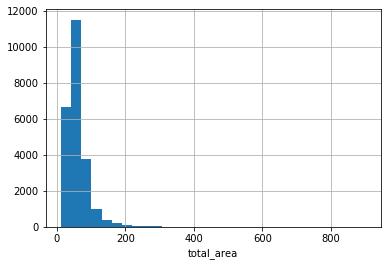

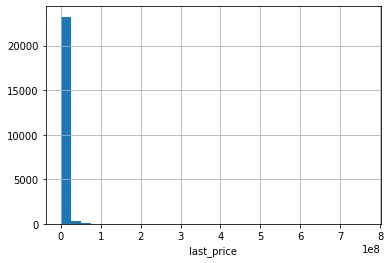

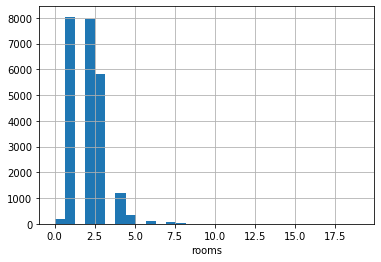

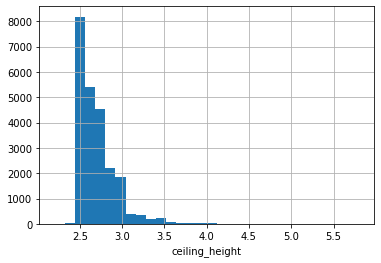

In [86]:
#Построим гистограммы для столбцов 'total_area', 'last_price', 'rooms', 'ceiling_height'
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    data[column].hist(bins=30)
    plt.xlabel(column)
    plt.show()

<a id='Step_4_2'></a>
#### 4.2 Исследование времени продажи квартиры

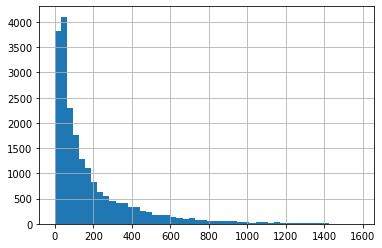

In [87]:
#Построим гистограммы для столбца 'days_in_exposition'
data['days_in_exposition'].hist(bins=50)

In [88]:
#Найдем среднее значение
data['days_in_exposition'].mean()

180.7652932008572

In [89]:
#Найдем медианное значение
data['days_in_exposition'].median()

95.0

In [90]:
#Исследуем стлобец методом describe
data['days_in_exposition'].describe()

count    20532.000000
mean       180.765293
std        219.703809
min          0.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_in_exposition, dtype: float64

(0, 1500)

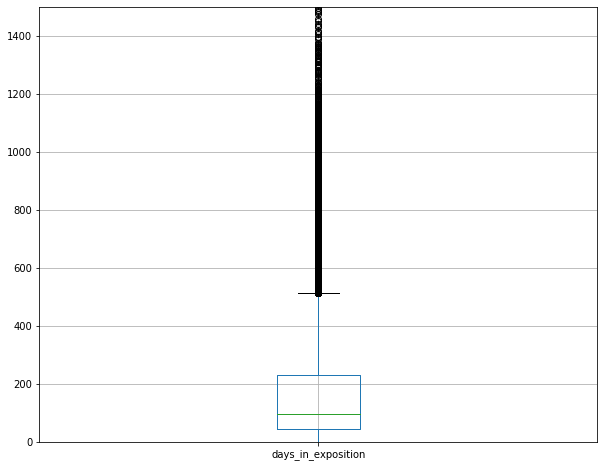

In [91]:
data.boxplot('days_in_exposition', figsize=(10, 8), grid=True)
plt.ylim(0, 1500)

<a id='Step_4_3'></a>
#### 4.3 Исследование выбросов

Для столбцов celling_height и floors_total выполнено на этапе переработки данных


(0, 20)

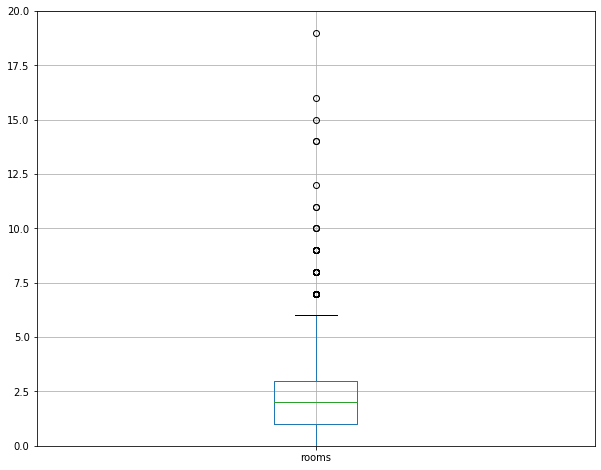

In [92]:
data.boxplot('rooms', figsize=(10, 8), grid=True)
plt.ylim(0, 20)

In [93]:
data.query('rooms>6')['rooms'].count()

90

Квартиры более 6 комнат не характерны для нашей выборки

(0, 2000)

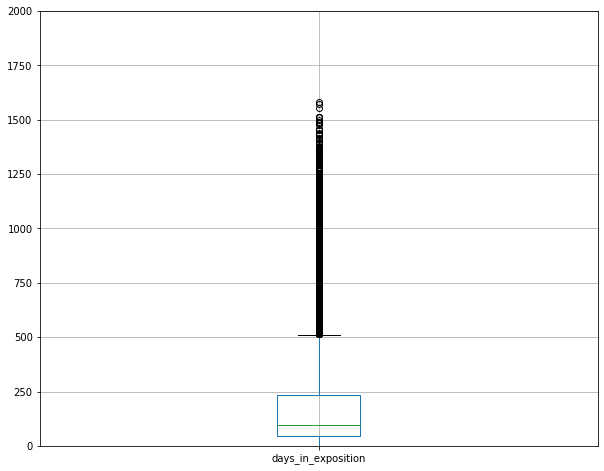

In [94]:
data.boxplot('days_in_exposition', figsize=(10, 8), grid=True)
plt.ylim(0, 2000)

In [95]:
data.query('days_in_exposition==0')['days_in_exposition'].count()

14

In [96]:
data.query('days_in_exposition>500')['days_in_exposition'].count()

1749

0 значения в столбце days_in_exposition, скорее всего выбросы. Квартира не может продаваться 0 дней. Значения более 500 могут пригодиться в дальнейшем исследовании

In [97]:
#Для дальнейшей работы создадим срез, в котором исключим квартиры более 6 комнат и объявления со сроком публикации 0 дней
cleaned_data = data.query('rooms <= 6 and days_in_exposition != 0')

<a id='Step_4_4'></a>
#### 4.4 Зависимость цены от площади

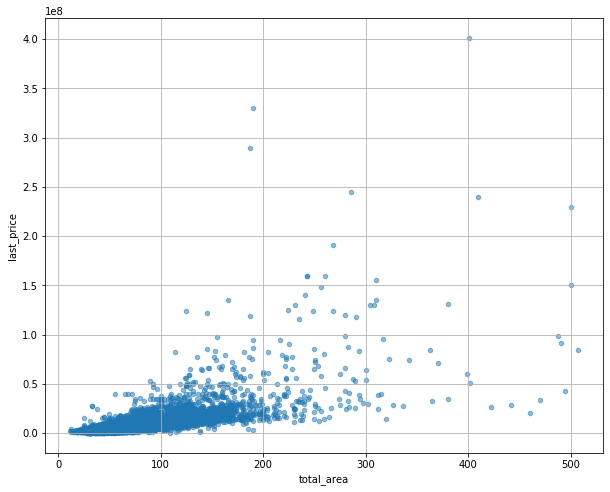

In [98]:
 cleaned_data.plot(x='total_area', y='last_price', kind='scatter', figsize=(10, 8), grid=True, alpha=0.5)

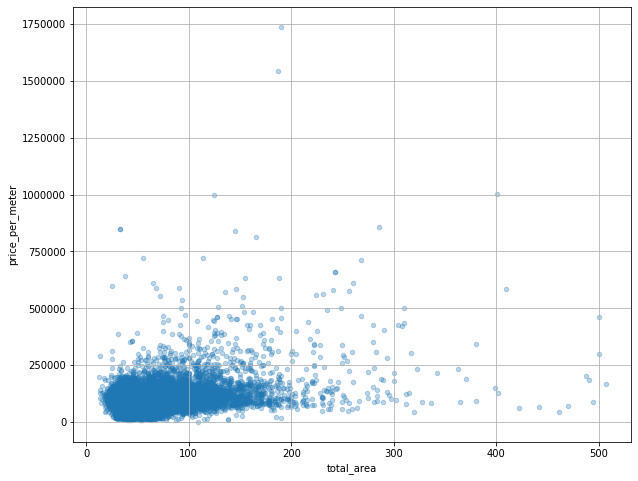

In [99]:
 cleaned_data.plot(x='total_area', y='price_per_meter', kind='scatter', figsize=(10, 8), grid=True, alpha=0.3)

<a id='Step_4_5'></a>
#### 4.5 Зависимость цены от числа комнат

In [100]:
 cleaned_data.groupby('rooms').agg({'last_price': ['count', 'median']})

last_price            
           count      median
rooms                       
0            183   2700000.0
1           8047   3600000.0
2           7940   4770169.0
3           5814   6200000.0
4           1180   9000000.0
5            326  14000000.0
6            105  19000000.0

In [101]:
cleaned_data.groupby('rooms').agg({'price_per_meter': ['count', 'median']})

price_per_meter               
                count         median
rooms                               
0                 183  105098.039216
1                8047  100000.000000
2                7940   92796.569440
3                5814   88983.050847
4                1180   92666.666667
5                 326   96517.068099
6                 105   99411.764706

<a id='Step_4_6'></a>
#### 4.6 Зависимость цены от удаленности от центра

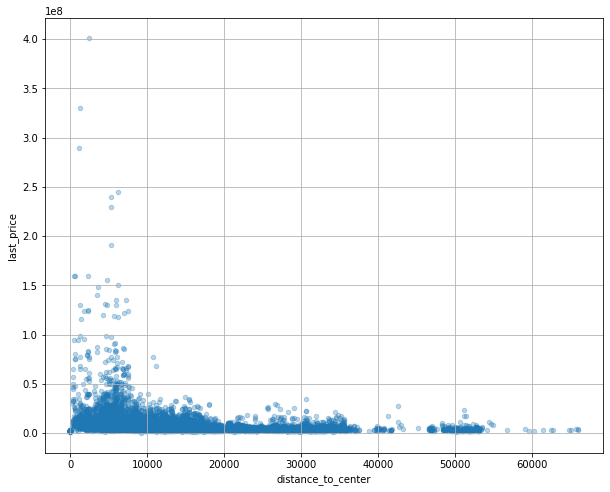

In [102]:
cleaned_data.plot(x='distance_to_center', y='last_price', kind='scatter', figsize=(10, 8), grid=True, alpha=0.3)

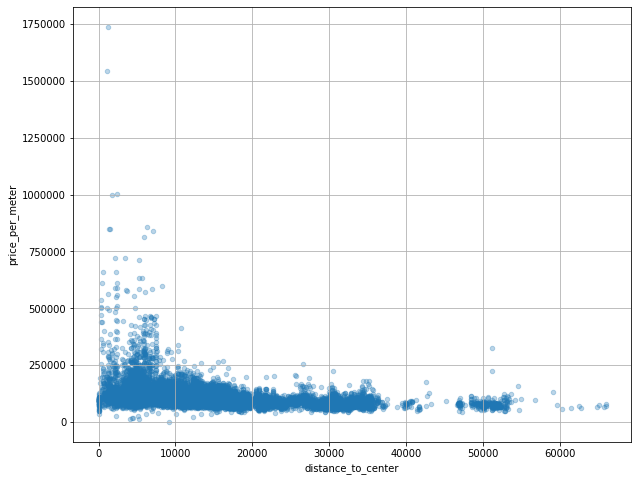

In [103]:
cleaned_data.plot(x='distance_to_center', y='price_per_meter', kind='scatter', figsize=(10, 8), grid=True, alpha=0.3)

<a id='Step_4_7'></a>
#### 4.7 Зависимость цены от этажа

In [104]:
cleaned_data.groupby('floor_type').agg({'last_price': ['count', 'median']})

last_price           
                count     median
floor_type                      
другой          17338  4824000.0
первый           2882  3900000.0
последний        3375  4300000.0

In [105]:
cleaned_data.groupby('floor_type').agg({'price_per_meter': ['count', 'median']})

price_per_meter              
                     count        median
floor_type                              
другой               17338  98264.949287
первый                2882  81250.000000
последний             3375  87649.402390

<a id='Step_4_8'></a>
#### 4.8 Зависимость цены от даты размещения:

дня недели

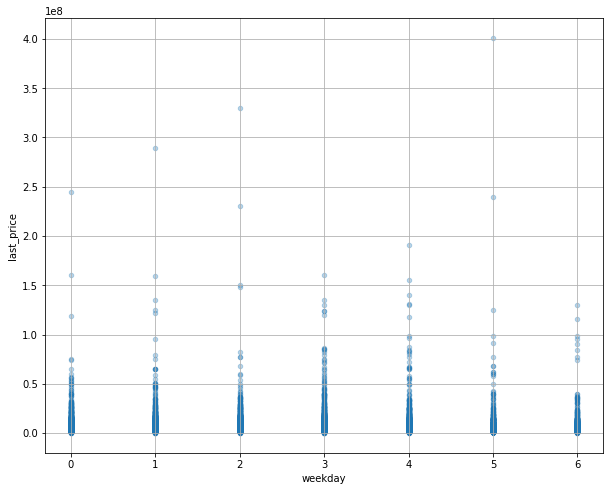

In [106]:
cleaned_data.plot(x='weekday', y='last_price', kind='scatter', figsize=(10, 8), grid=True, alpha=0.3)

месяца

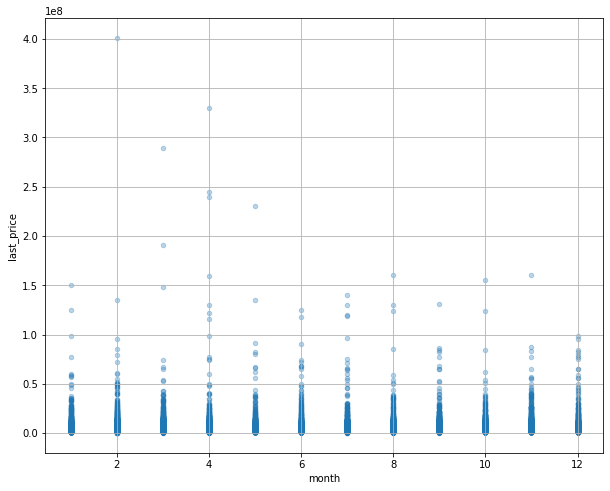

In [107]:
cleaned_data.plot(x='month', y='last_price', kind='scatter', figsize=(10, 8), grid=True, alpha=0.3)

года

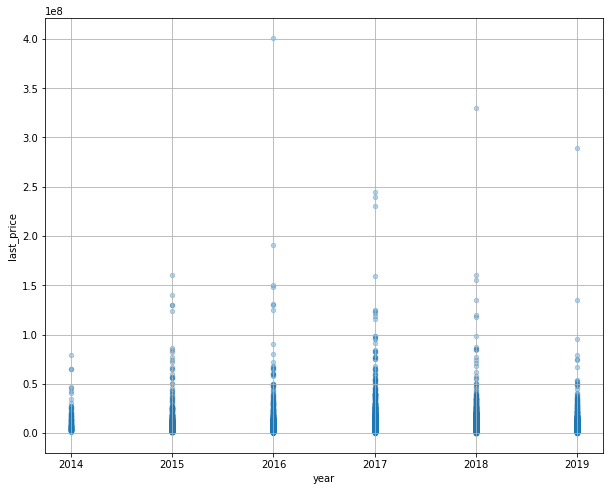

In [108]:
cleaned_data.plot(x='year', y='last_price', kind='scatter', figsize=(10, 8), grid=True, alpha=0.3)

### Выводы:
#### Время продажи квартиры:
<p>Медианное время продажи квартиры - 95 дней</p>
<p>Быстрое время продажи квартиры - менее 45 дней</p>
<p>Долгое время продажи квартиры - более 500 дней. Было бы интересно исследовать причины длительной продажижи квартир. На основании исследования построить рекомендательный сервис для покупателей.</p>
<p>Встречаются квартиры с временем продажи 0 дней. Необходимо исследовать причину появления таких значений. Возможно, покупатель снял объявление после публикации.</p>
Вывод: зависимости цены от даты публикации объявления не выявлено
#### Зависимость цены от площади: 
<p>По мере возрастания площади квартиры цена возрастает. Для больших квартир более 100 метров разброс значений цены больше, чем для маленьких.</p>
#### Завсимость цены от количества комнат: 
<p>по мере возрастания количества комнат медианная 'last_price' возрастает, а медианная 'price_per_meter' - убывает</p>
#### Зависимость цены от удаленности от центра: 
<p>квартиры, находящиеся ближе к центру стоят дороже. Для квартир, где расстояние до центра менее 10000 м характерен больший разброс значений: встречаются очень дорогие.</p>
#### Зависимость цены от этажа:
<p>Стоимость квартир крайних этажей ниже. Последний этаж стоит дороже первого</p>
#### Зависимость цены даты публикации объявления:
<p>Зависимость не выявлена</p>

<a id='Step_4_9'></a>
#### 4.9 Исследование топ-10 населенных пунктов по количеству объявлений

In [109]:
top_locality_names = cleaned_data.groupby('locality_name').agg({'price_per_meter': ['count', 'median']})

In [110]:
top_locality_names.columns = ['count', 'median_price_per_meter']

In [111]:
#10 населённых пунктов с наибольшим числом объявлений
top_locality_names.sort_values(by='count', ascending=False).head(10)

,count,median_price_per_meter
locality_name,,
Санкт-Петербург,15654,104749.301676
поселок Мурино,556,85878.462169
поселок Шушары,440,76876.172608
Всеволожск,396,65789.473684
Пушкин,368,99993.589744
Колпино,337,74722.222222
поселок Парголово,326,91780.224134
Гатчина,307,67796.610169
деревня Кудрово,299,91860.465116


In [112]:
#10 населённых пунктов с самой высокой стоимостью жилья
top_locality_names.sort_values(by='median_price_per_meter', ascending=False).head(10)

,count,median_price_per_meter
locality_name,,
Санкт-Петербург,15654,104749.301676
Зеленогорск,24,101666.666667
Кудрово,172,100000.000000
Пушкин,368,99993.589744
Сестрорецк,183,99678.456592
поселок Левашово,1,96997.690531
деревня Кудрово,299,91860.465116
поселок Парголово,326,91780.224134
деревня Мистолово,11,90888.888889


In [113]:
#10 населённых пунктов с самой низкой стоимостью жилья
top_locality_names.sort_values(by='median_price_per_meter', ascending=False).tail(10)

,count,median_price_per_meter
locality_name,,
поселок Житково,2,14956.275202
деревня Ям-Тесово,2,13711.553373
деревня Сижно,1,13709.677419
поселок Тесово-4,1,12931.034483
деревня Малая Романовка,1,12724.550898
поселок Совхозный,2,12629.129129
деревня Выскатка,2,12335.480902
деревня Вахнова Кара,1,11688.311688
поселок станции Свирь,2,11481.481481


<a id='Step_4_10'></a>
#### 4.10 Исследование квартир в центре Санкт-Петербурга

In [114]:
spb_data = cleaned_data.query('locality_name == "Санкт-Петербург"')

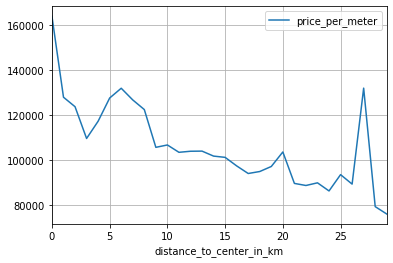

In [115]:
spb_data.groupby('distance_to_center_in_km').agg({'price_per_meter': 'median'}).plot(grid=True)

Вывод: предполагаемая граница центра 3 км

In [116]:
#Сделаем срез по квартирам в центре Санкт-Петербурга
spb_center_data = spb_data.query('distance_to_center_in_km < 3')

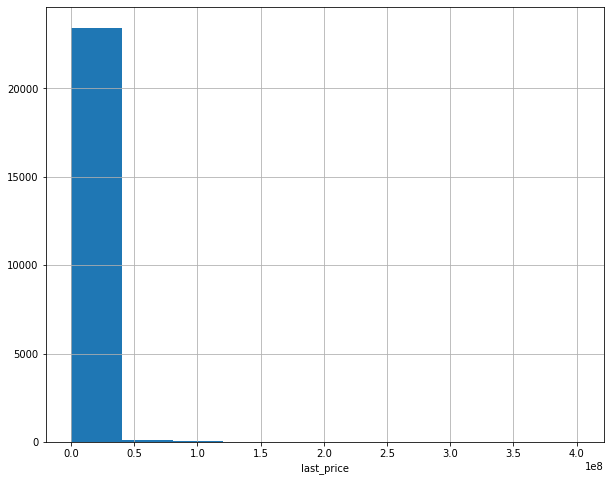

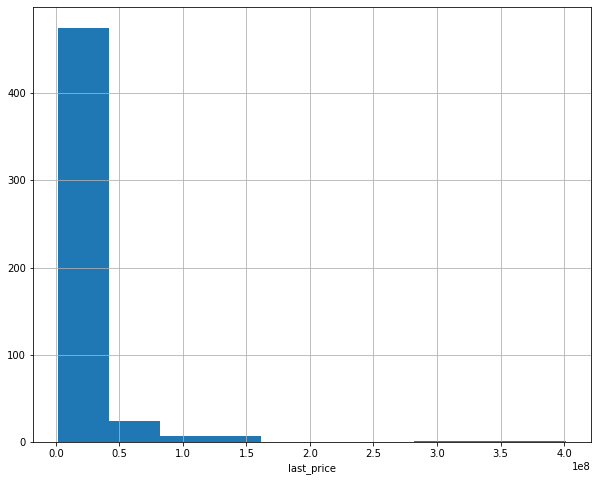

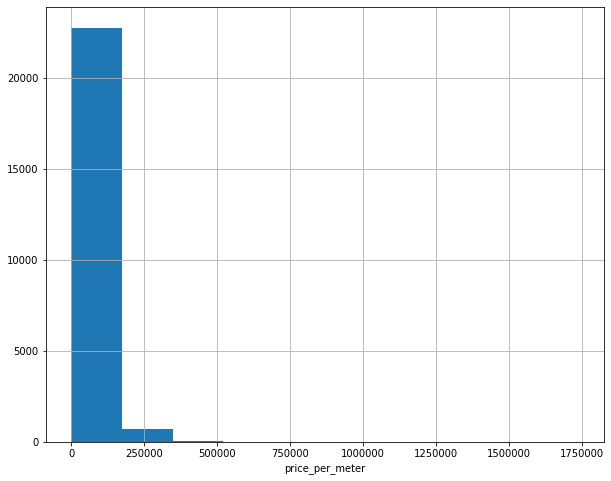

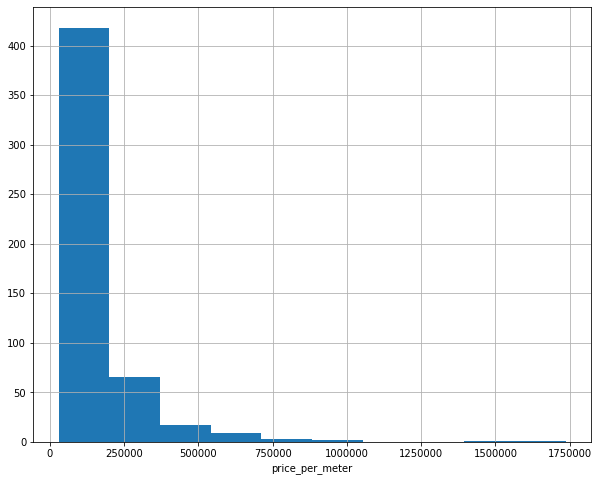

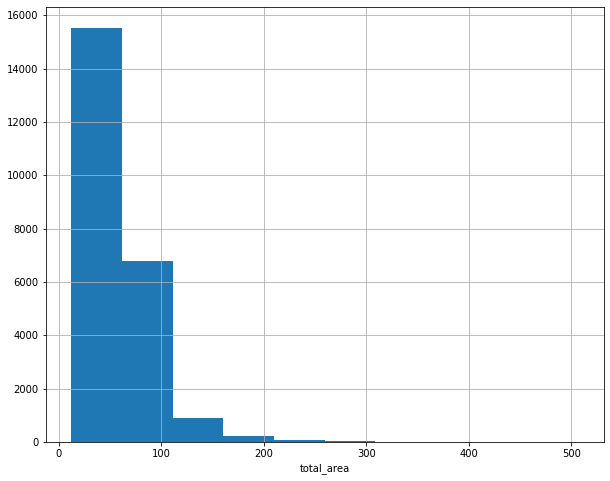

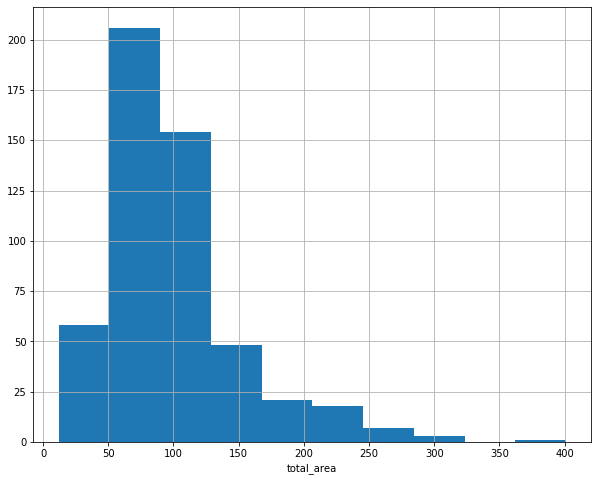

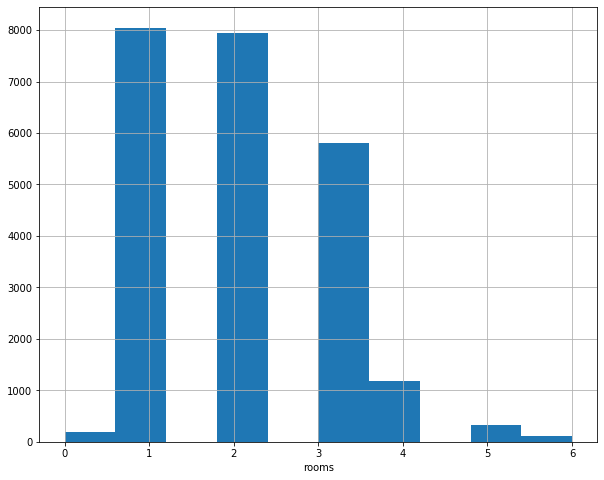

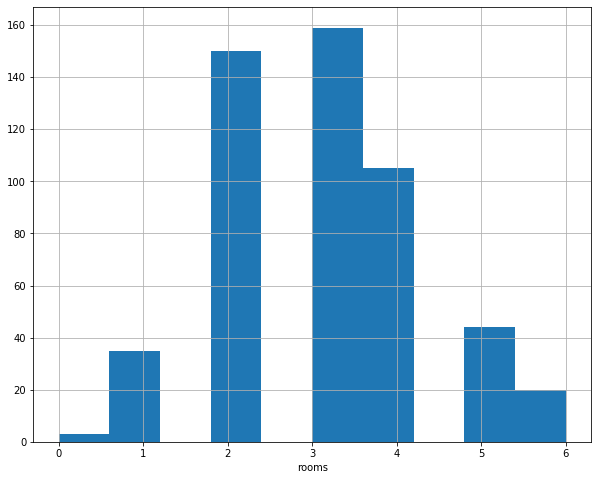

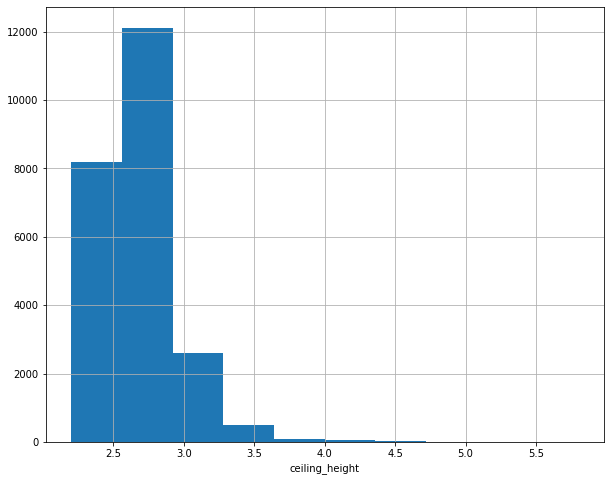

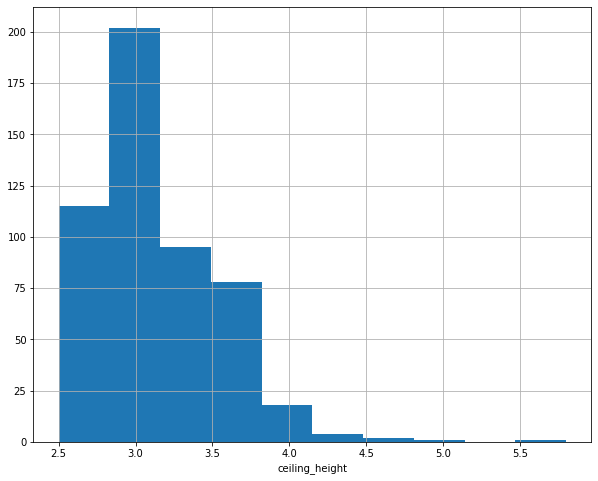

In [117]:
#Построим гистограммы для сравнения по заданным параметрам 'last_price', 'price_per_meter', 'total_area', 'rooms', 'ceiling_height' 
for column in ['last_price', 'price_per_meter', 'total_area', 'rooms', 'ceiling_height']:
    cleaned_data[column].hist(figsize=(10, 8), grid=True)
    plt.xlabel(column)
    plt.show()
    spb_center_data[column].hist(figsize=(10, 8), grid=True)
    plt.xlabel(column)
    plt.show()

### Вывод:
- last_price - и в городе в целом, и в центре преобладают квартиры стоимостью до 5 млн. Квартиры, стоимостью больше 10 млн в основном находятся в центре.
- price_per_meter - аналогичная закономерность.
- total_area - в городе преобладают маленькие квартиры, площадью менее 50м2, в центре преобладают квартиры от 50 до 100 м2
- rooms - в городе преобладают однокомнатные и двухконатные квартиры, в центре нет студий, двухкомнатных и трехкомнатных квартир больше, чем однокомнатных.
- ceiling_height - в городе предоблают квартиры с потолками менее 2,75. Медианная высота для центра - 3м

***<a href='#top'>Вернуться в начало</a>***

<a id='Step_5'></a>
### Шаг 5. Общий вывод

<p>В городе в целом преобладает советское типовое жилье. Чаще всего встречаются 5 и 9 этажные дома с небольшими квартирами до 50м2 и невысокими потолками 2.50м. В основном предладают 1,2,3 конатные квартиры.</p>
<p>В центре преобладают невысокие здания порядка 5 этажей. Площадь квартир как правило больше 50 м2. Потолки в среднем 3 м2 и выше. Студии и однокомнатные квартиры для центра не характерны. Встречаются очень большие квартиры более 6 комнат.</p>
<p>Близость к центру является фактором, выляющим на цену квартиры в Санкт-Петербурге. Квартиры в центре стоят дороже.</p>


***<a href='#top'>Вернуться в начало</a>***